In [1]:
import numpy as np
import MDAnalysis as mda
from nmrdfrommd import NMRD

In [3]:
datapath = "../data/"

u = mda.Universe(datapath+"production.data",
                 datapath+"production.xtc")

In [5]:
n_TOT = u.atoms.n_residues
n_H2O = u.select_atoms("type 6 7").n_residues
n_PEG = u.select_atoms("type 1 2 3 4 5").n_residues

print(f"The total number of molecules is {n_TOT} ({n_H2O} H2O, {n_PEG} PEG)")

The total number of molecules is 450 (420 H2O, 30 PEG)


In [6]:
timestep = np.int32(u.trajectory.dt)
total_time = np.int32(u.trajectory.totaltime)

print(f"The timestep is {timestep} ps")
print(f"The total simulation time is {total_time//1000} ns")

The timestep is 2 ps
The total simulation time is 10 ns


In [7]:
H_PEG = u.select_atoms("type 3 5")
H_H2O = u.select_atoms("type 7")
H_ALL = H_PEG + H_H2O

In [8]:
nmr_all = NMRD(
    u=u,
    atom_group=H_ALL,
    neighbor_group = H_ALL,
    number_i=40)
nmr_all.run_analysis()

In [9]:
T1 = np.round(nmr_all.T1, 2)

print(f"The NMR relaxation time is T1 = {T1} s")

The NMR relaxation time is T1 = 1.04 s


In [10]:
R1_spectrum = nmr_all.R1
R2_spectrum = nmr_all.R2
f = nmr_all.f

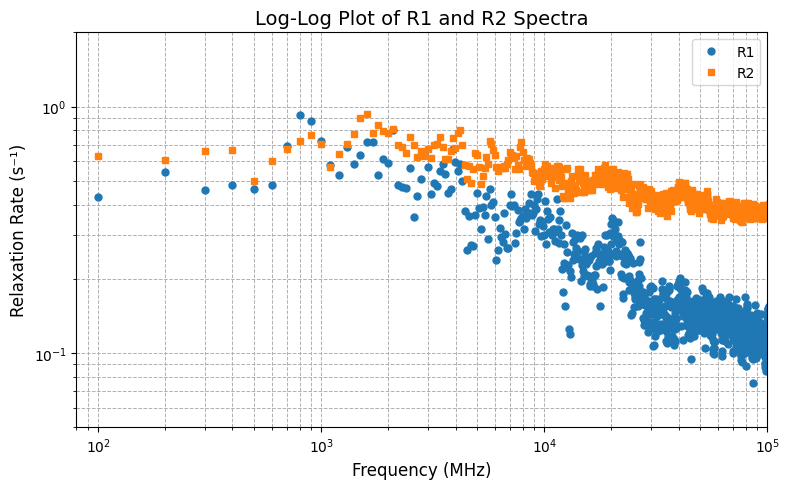

In [22]:
from matplotlib import pyplot as plt

# Plot settings
plt.figure(figsize=(8, 5))
plt.loglog(f, R1_spectrum, 'o', label='R1', markersize=5)
plt.loglog(f, R2_spectrum, 's', label='R2', markersize=5)

# Labels and Title
plt.xlabel("Frequency (MHz)", fontsize=12)
plt.ylabel("Relaxation Rate (s⁻¹)", fontsize=12)
plt.title("Log-Log Plot of R1 and R2 Spectra", fontsize=14)

# Grid and boundaries
plt.grid(True, which="both", linestyle='--', linewidth=0.7)
plt.xlim(80, 1e5)
plt.ylim(0.05, 2)

# Legend
plt.legend()
plt.tight_layout()
plt.show()


In [30]:
nmr_h2o_intra = NMRD(
    u=u,
    atom_group=H_H2O,
    type_analysis="intra_molecular",
    number_i=200)
nmr_h2o_intra.run_analysis()

nmr_peg_intra = NMRD(
    u=u,
    atom_group=H_PEG,
    type_analysis="intra_molecular",
    number_i=200)
nmr_peg_intra.run_analysis()

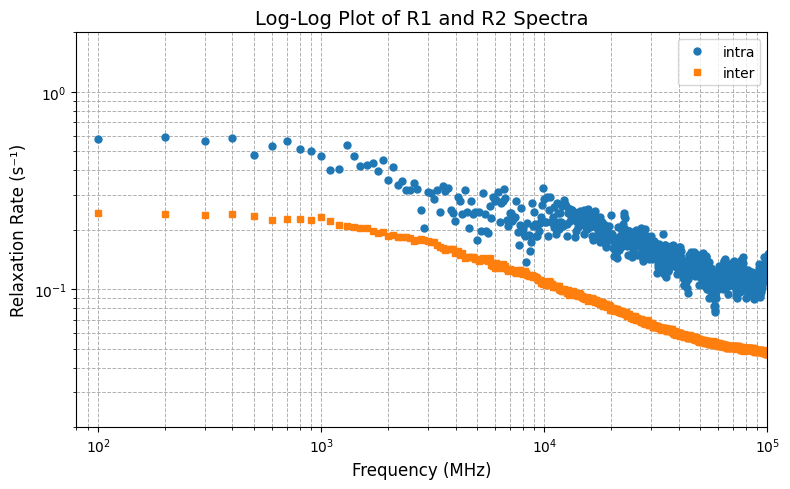

In [ ]:
# Plot settings
plt.figure(figsize=(8, 5))
plt.loglog(nmr_h2o_intra.f, nmr_h2o_intra.R1, 'o', label='H2O', markersize=5)
plt.loglog(nmr_peg_intra.f, nmr_peg_intra.R1, 's', label='PEG', markersize=5)

# Labels and Title
plt.xlabel("Frequency (MHz)", fontsize=12)
plt.ylabel("Intramolecular Relaxation Rate (s⁻¹)", fontsize=12)
plt.title("Log-Log Plot of R1 and R2 Spectra", fontsize=14)

# Grid and boundaries
plt.grid(True, which="both", linestyle='--', linewidth=0.7)
plt.xlim(80, 1e5)
plt.ylim(0.02, 2)

# Legend
plt.legend()
plt.tight_layout()
plt.show()